# Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar Datos

In [2]:
preprocessed_penguins_df = sns.load_dataset("penguins")
preprocessed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Validación de datos

## ¿Qué tipo de dato tienen las variables del dataset?

In [3]:
preprocessed_penguins_df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


## ¿Cuántas variables de cada tipo tenemos en el dataset?

In [5]:
preprocessed_penguins_df.dtypes.value_counts()

,count
float64,4
object,3


## ¿Cuántas variables y observaciones tenemos en el dataset?

In [6]:
preprocessed_penguins_df.shape

(344, 7)

# Validación de datos nulos

## ¿Existen valores nulos en el dataset?

In [10]:
preprocessed_penguins_df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


## ¿Qué variables tienen datos nulos?

In [ ]:
preprocessed_penguins_df.isnull().any()

# ¿Cuántos valores nulos tenemos por variable?

In [23]:
preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)

,0
sex,11
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
species,0
island,0


## ¿Cuántos valores nulos tenemos en total?

In [20]:
preprocessed_penguins_df.isnull().sum().sum()

19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [ ]:
preprocessed_penguins_df.isnull().melt(value_name="missing")

## Graficamos la proporcion de los valores nulos

In [33]:
penguins_null_df = preprocessed_penguins_df.isnull().melt(value_name="missing")
penguins_null_df

,variable,missing
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2403,sex,True
2404,sex,False
2405,sex,False
2406,sex,False


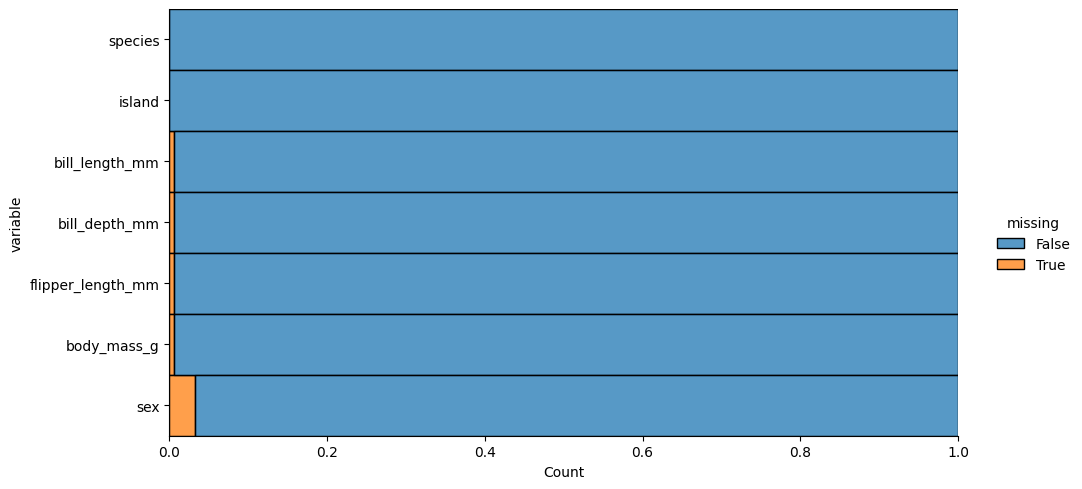

In [34]:
sns.displot(
    data=penguins_null_df,
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.show()

In [ ]:
(
    preprocessed_penguins_df
      .isnull()
      .melt(value_name="missing")
      .pipe(
          lambda df:
            sns.displot(
              data=df,
              y="variable",
              hue="missing",
              multiple="fill",
              aspect=2
         )
      )
)

plt.show()

## ¿Cómo ver los valores nulos en todo el dataset?

In [ ]:
(
  preprocessed_penguins_df
    .isnull()
    .any(axis=1)
)

In [ ]:
(
    preprocessed_penguins_df[
        preprocessed_penguins_df
          .isnull()
          .any(axis=1)
    ]
)

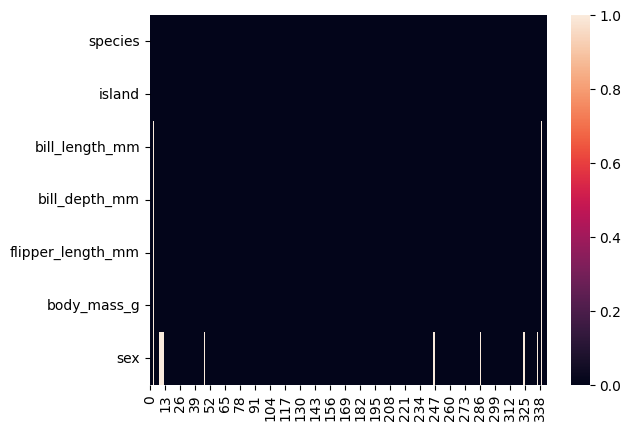

In [55]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df:
          sns.heatmap(
              data=df
          )
    )
)
plt.show()

## ¿Cuántos registros me quedarían si elimino los nulos?

In [56]:
preprocessed_penguins_df.shape

(344, 7)

In [57]:
preprocessed_penguins_df_nulls = preprocessed_penguins_df.dropna()
preprocessed_penguins_df_nulls.shape

(333, 7)

In [59]:
preprocessed_penguins_df.shape[0] - preprocessed_penguins_df_nulls.shape[0]

11